In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import IPython

from PIL import Image

In [2]:
def gray_scale_to_binary(gray):
    img_temp = gray
    for i, arr in enumerate(img_temp):
        img_temp[i] = [1 if val <= 128 else 0 for val in arr]
    return img_temp

def display_image(img_array, title=""):
    plt.imshow(1 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def display_image255(img_array):
    plt.imshow(255 - img_array, cmap='gray')
    plt.axis('off')
    plt.show()

T1 = np.array((
 [1, 1, 1],
 [0, -1, 1],
 [0, 0, 0]), dtype="int")

T2 = np.rot90(T1, k=3)

T3 = np.rot90(T2, k=3)

T4 = np.rot90(T3, k=3)

T5 = np.array((
 [1, 1, 1],
 [1, -1, 0],
 [0, 0, 0]), dtype="int")

T6 = np.rot90(T5, k=3)

T7 = np.rot90(T6, k=3)

T8 = np.rot90(T7, k=3)

def add_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = np.zeros((rows + n * 2, cols + n * 2), dtype=matrix.dtype)
    new_matrix[n:rows + n, n:cols + n] = matrix
    return new_matrix

def remove_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = matrix[n:rows - n, n:cols - n]
    return new_matrix

def thickening(X, T):
    hit_and_miss = np.array(cv.morphologyEx(X * 255, cv.MORPH_HITMISS, T) / 255, np.uint8)
    return cv.bitwise_or(X, hit_and_miss)

def psi(X):
    X = add_border(X)
    return remove_border(thickening(thickening(thickening(thickening(thickening(thickening(thickening(thickening(X, T1), T2), T3), T4), T5), T6), T7), T8))

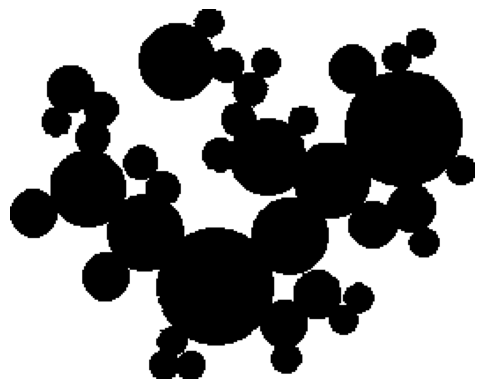

In [3]:
filename = '44'
binary_image = cv.imread(f'{filename}.jpg', cv.IMREAD_GRAYSCALE)
_, binary_image = cv.threshold(binary_image, 232, 255, 0)
binary_image = gray_scale_to_binary(binary_image)
display_image(binary_image)

In [4]:
def multiply_struct_elem(B, n):
    R = np.array([[1]], np.uint8)
    for _ in range(n):
        R = cv.dilate(add_border(R, 1), B)
    return R

def opening(X, B):
    return cv.dilate(cv.erode(X, B), B)

def closure(X, B):
    return cv.erode(cv.dilate(X, B), B)

def PS(X, n, B):
    if n >= 0:
        first = opening(X, multiply_struct_elem(B, n))
        second = opening(X, multiply_struct_elem(B, n + 1))
        return sum(sum(cv.bitwise_and(first, 1 - second)))
    else:
        first = closure(X, multiply_struct_elem(B, -n))
        second = closure(X, multiply_struct_elem(B, -n - 1))
        return sum(sum(cv.bitwise_and(first, 1 - second)))

In [5]:
B = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], np.uint8)

X = binary_image

In [6]:
closures = []
K = 0
while K <= max(X.shape) + 1:
    K += 1
    closures.append(closure(X, multiply_struct_elem(B, K - 1)))
    # print(K)

while sum(sum(cv.bitwise_and(closures[K - 1], 1 - closures[K - 2]))) == 0:
    K -= 1
    # print(K)

In [7]:
N = 0
X = binary_image
while not np.array_equal(t:= cv.erode(X, multiply_struct_elem(B, N)), np.zeros(X.shape)):
    N += 1
print(N)

34


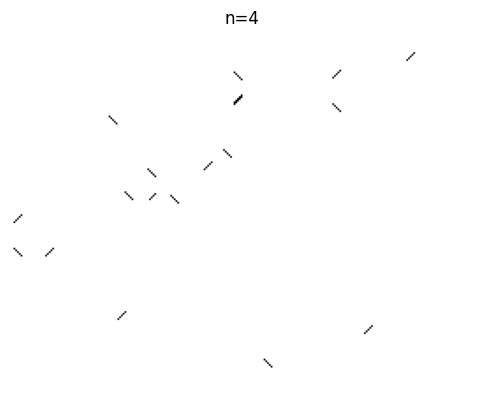

In [8]:
for n in range(5):
    IPython.display.clear_output(wait=True)
    first = opening(binary_image, multiply_struct_elem(B, n))
    second = opening(binary_image, multiply_struct_elem(B, n + 1))
    display_image(cv.bitwise_and(first, 1 - second), f"n={n}")

<BarContainer object of 129 artists>

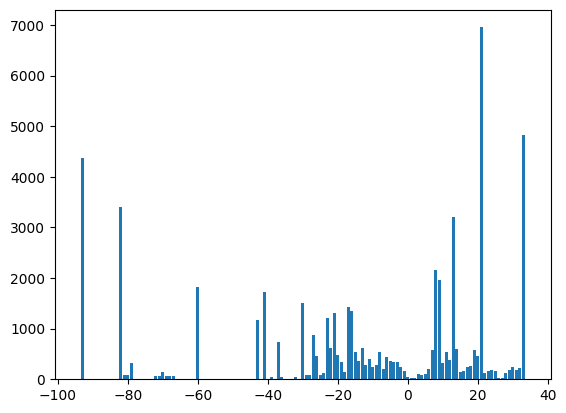

In [9]:
set = {}
for n in range(-K, N + 1):
    set[n] = PS(binary_image, n, B)
    # print(n)
plt.bar(set.keys(), set.values())